In [ ]:
pip freeze > requirements.txt

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot 
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime, date
import lightgbm as lgb
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

#plt.style.use('bmh')

In [2]:
from pandas_profiling import ProfileReport

In [3]:
petrignano = pd.read_csv('.\datasets\Aquifer_Petrignano.csv')

In [4]:
petrignano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  5223 non-null   object 
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64
 2   Depth_to_Groundwater_P24              5168 non-null   float64
 3   Depth_to_Groundwater_P25              5184 non-null   float64
 4   Temperature_Bastia_Umbra              4199 non-null   float64
 5   Temperature_Petrignano                4199 non-null   float64
 6   Volume_C10_Petrignano                 5025 non-null   float64
 7   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64
dtypes: float64(7), object(1)
memory usage: 326.6+ KB


In [5]:
petrignano.head(5)

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [6]:
petrignano.tail(5)

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
5218,26/06/2020,0.0,-25.68,-25.07,25.7,24.5,-29930.688,2.5
5219,27/06/2020,0.0,-25.80,-25.11,26.2,25.0,-31332.960,2.4
5220,28/06/2020,0.0,-25.80,-25.19,26.9,25.7,-32120.928,2.4
5221,29/06/2020,0.0,-25.78,-25.18,26.9,26.0,-30602.880,2.4
5222,30/06/2020,0.0,-25.91,-25.25,27.3,26.5,-31878.144,2.4


<AxesSubplot:>

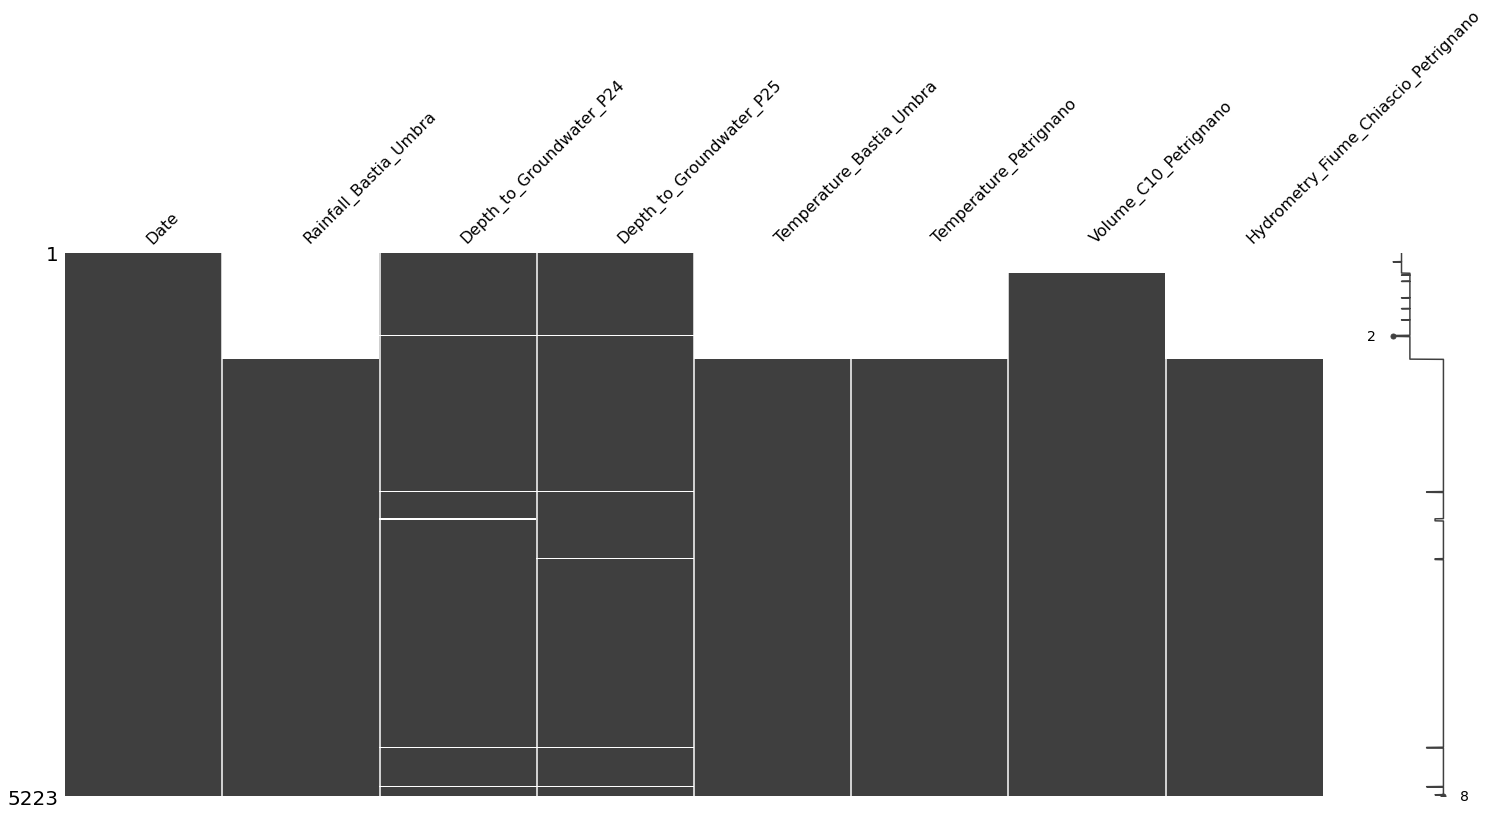

In [7]:
msno.matrix(petrignano)

In [8]:
col_names=pd.Series(petrignano.columns)
col_names

0                                    Date
1                   Rainfall_Bastia_Umbra
2                Depth_to_Groundwater_P24
3                Depth_to_Groundwater_P25
4                Temperature_Bastia_Umbra
5                  Temperature_Petrignano
6                   Volume_C10_Petrignano
7    Hydrometry_Fiume_Chiascio_Petrignano
dtype: object

In [9]:
petrignano['Date']=pd.to_datetime(petrignano['Date'],format='%d/%m/%Y')
petrignano.set_index('Date',inplace=True)

numpy.ndarray

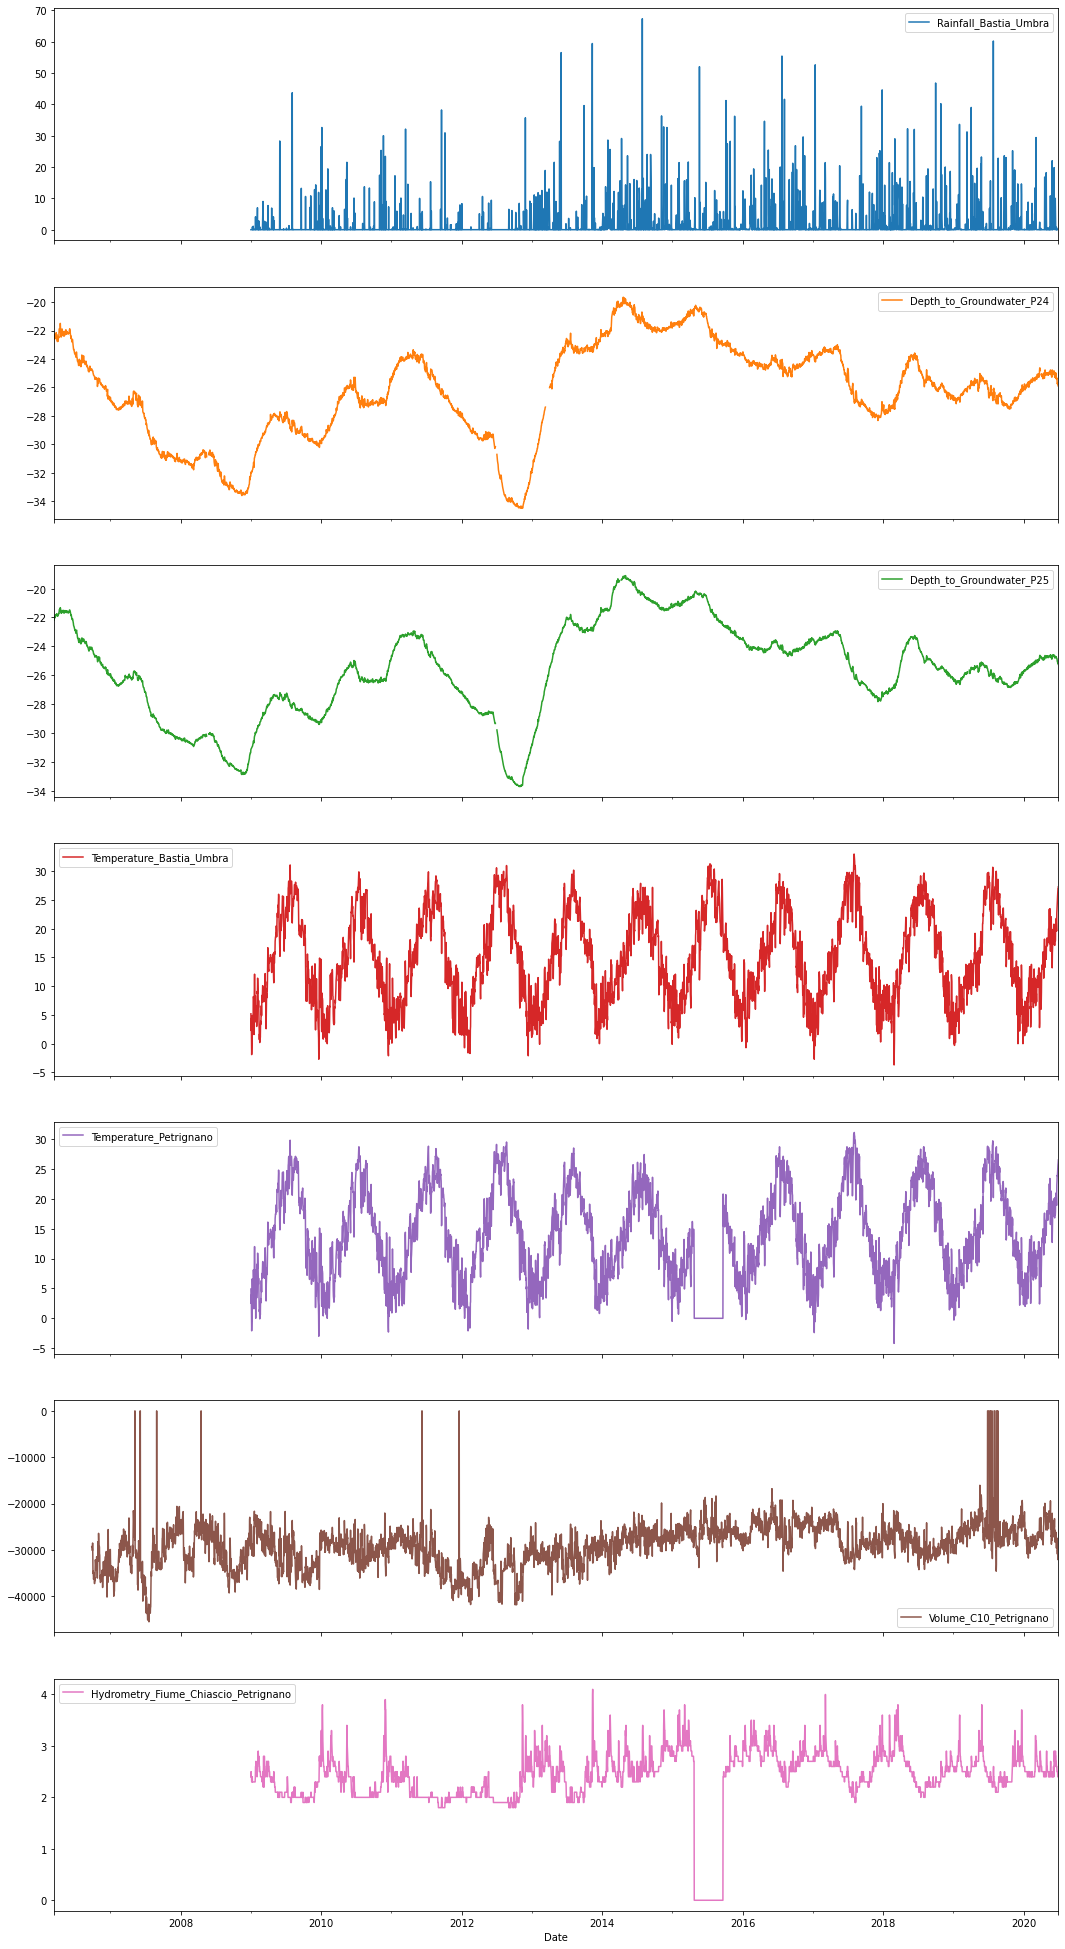

In [10]:
axes = petrignano.plot.line(subplots=True,figsize=(18,35))
type(axes)

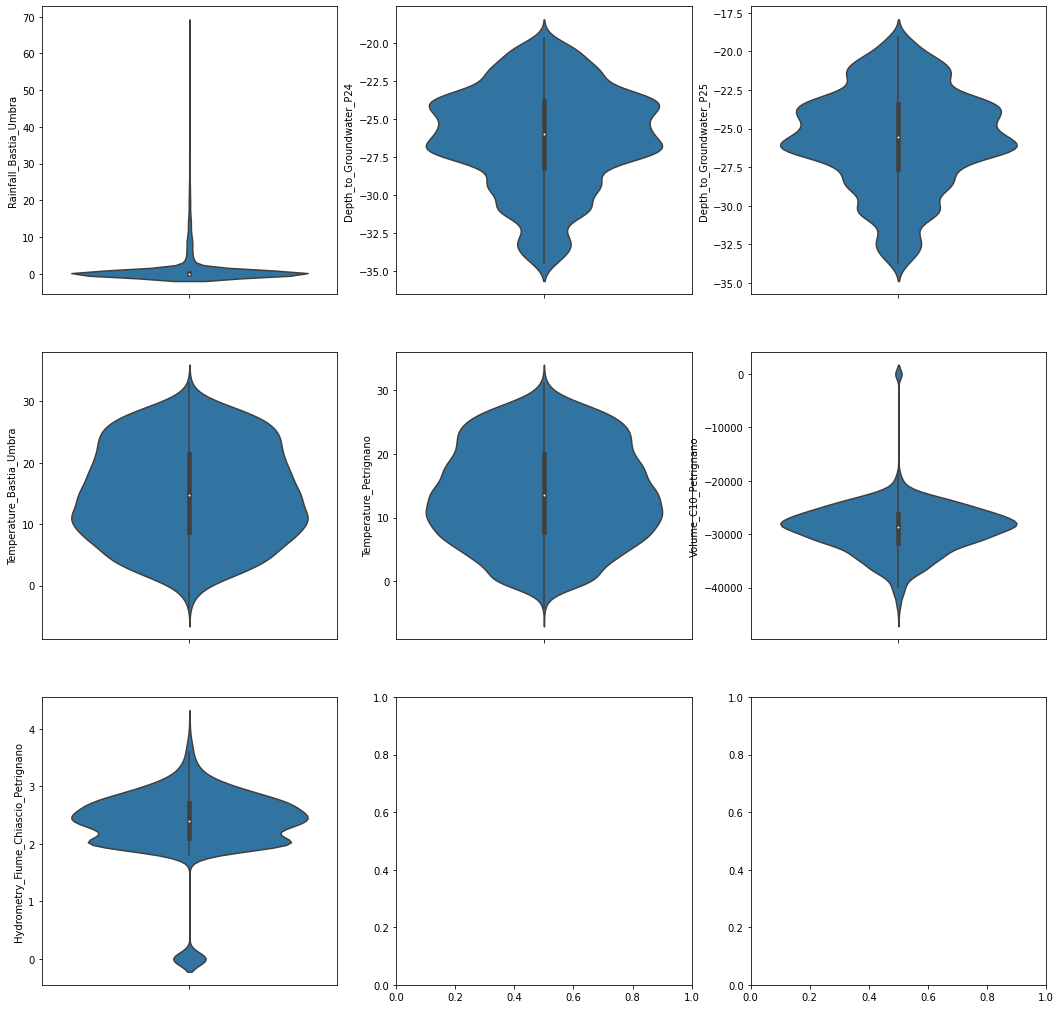

In [11]:
row_num=((len(col_names)-1)//3)+1
fig, ax = pyplot.subplots(nrows=row_num,ncols=3,figsize =(18, row_num*6))   
ax1=ax.flatten()
for i,t in enumerate(col_names[1:]):
    sns.violinplot(ax=ax1[i],y=t, data=petrignano) 
    

In [12]:
petrignano=petrignano.iloc[1024:]

In [13]:
petrignano.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4199 entries, 2009-01-01 to 2020-06-30
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Rainfall_Bastia_Umbra                 4199 non-null   float64
 1   Depth_to_Groundwater_P24              4160 non-null   float64
 2   Depth_to_Groundwater_P25              4172 non-null   float64
 3   Temperature_Bastia_Umbra              4199 non-null   float64
 4   Temperature_Petrignano                4199 non-null   float64
 5   Volume_C10_Petrignano                 4198 non-null   float64
 6   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64
dtypes: float64(7)
memory usage: 262.4 KB


In [15]:
petrignano[col_names[7]].replace(to_replace=0,value=np.nan,inplace=True)
petrignano[col_names[6]].replace(to_replace=0,value=np.nan,inplace=True)

For temperature, as normally it also takes values as zero, we have to replace it in some range of values only

In [17]:
petrignano.loc[((petrignano.index>=datetime(2015,1,1)) & (petrignano.index<=datetime(2016,1,1)) & (petrignano[col_names[5]]==0)),col_names[5]]=np.nan

c:\users\mansitsuman\desktop\water\aceawateranalytics\waterenv\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\users\mansitsuman\desktop\water\aceawateranalytics\waterenv\lib\site-packages\pandas\core\indexing.py:691: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


numpy.ndarray

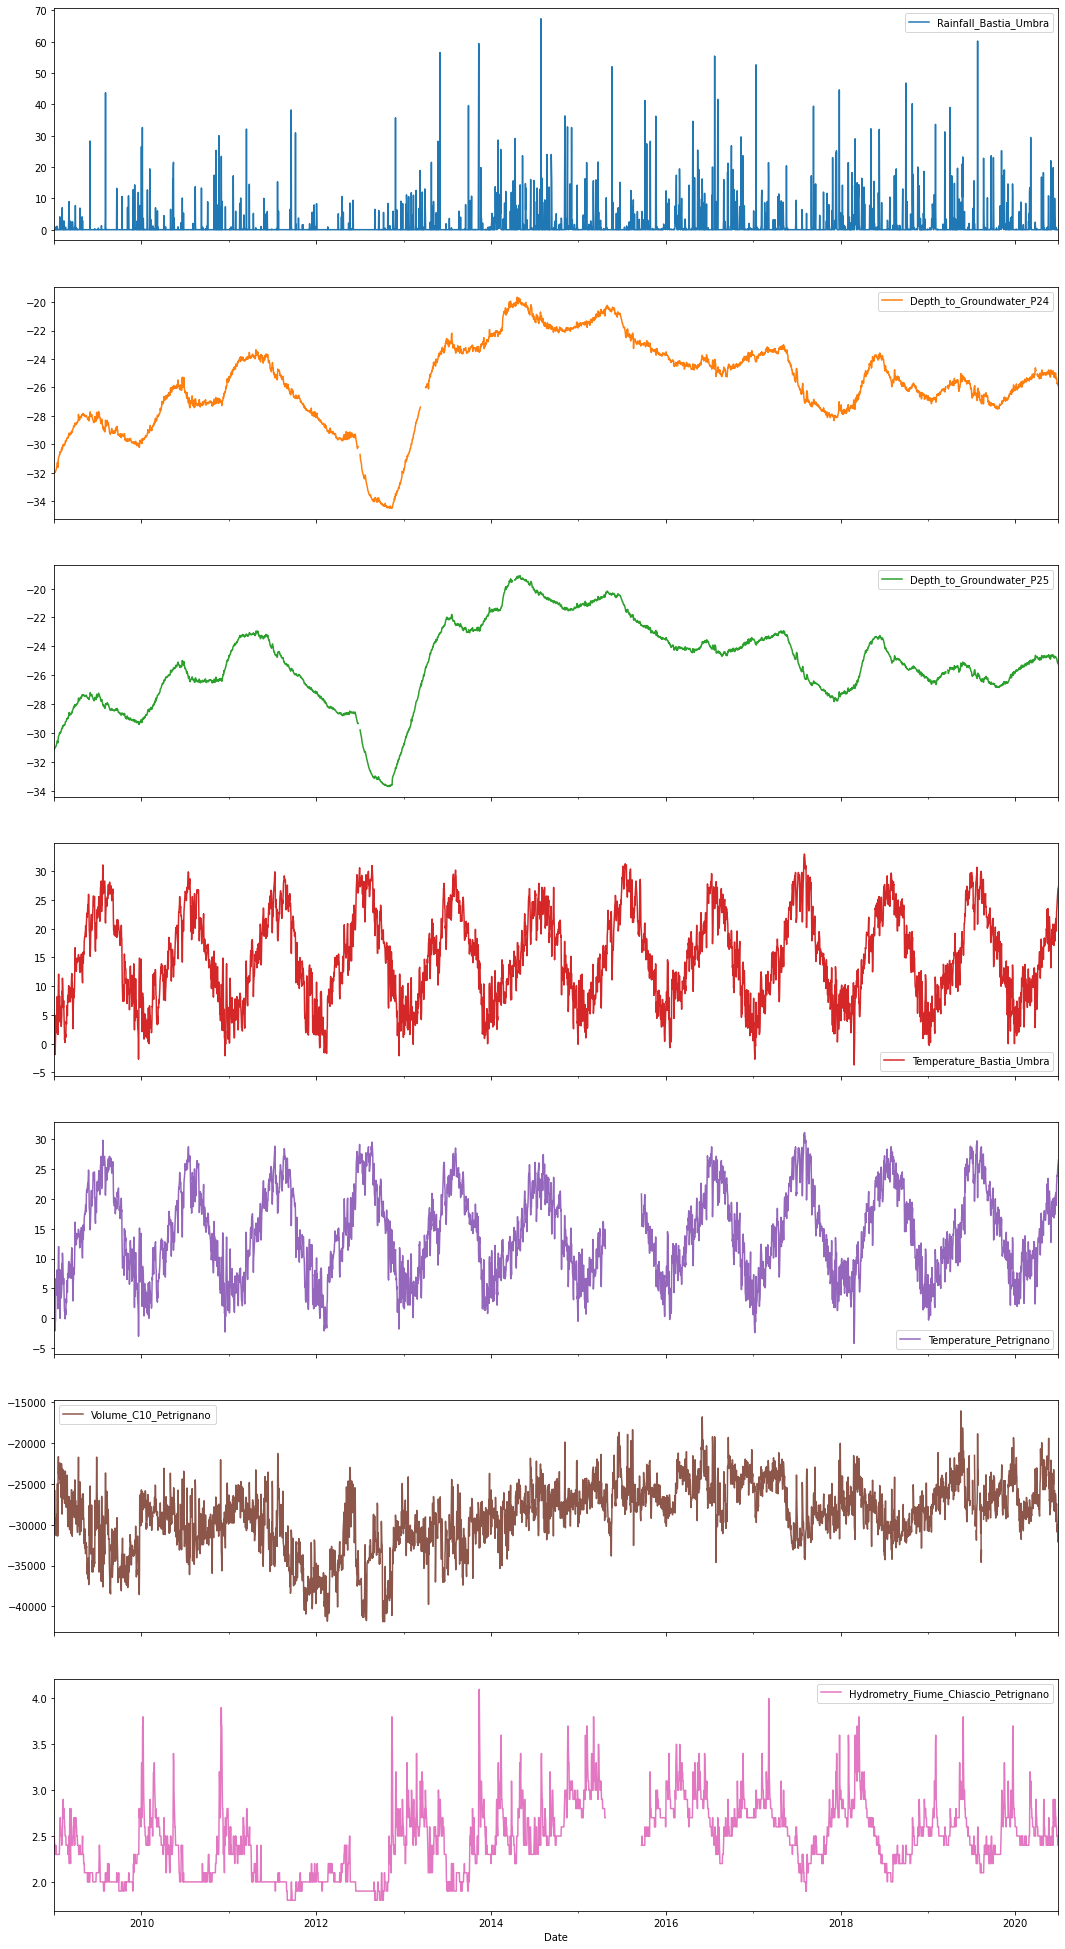

In [18]:
axes = petrignano.plot.line(subplots=True,figsize=(18,35))
type(axes)

<AxesSubplot:>

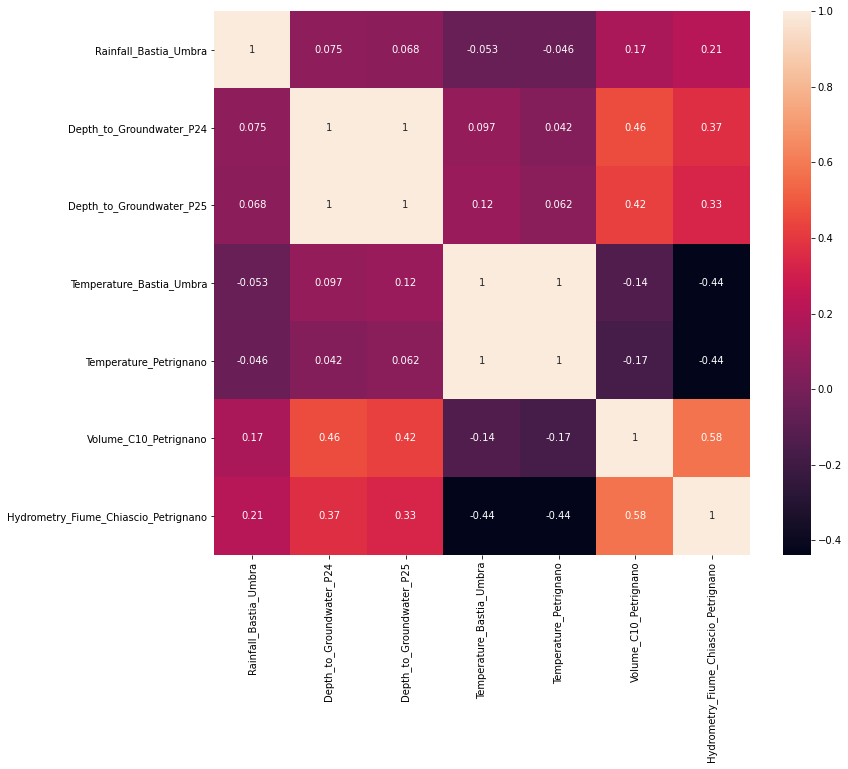

In [19]:
corr=petrignano.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,annot=True)

<AxesSubplot:>

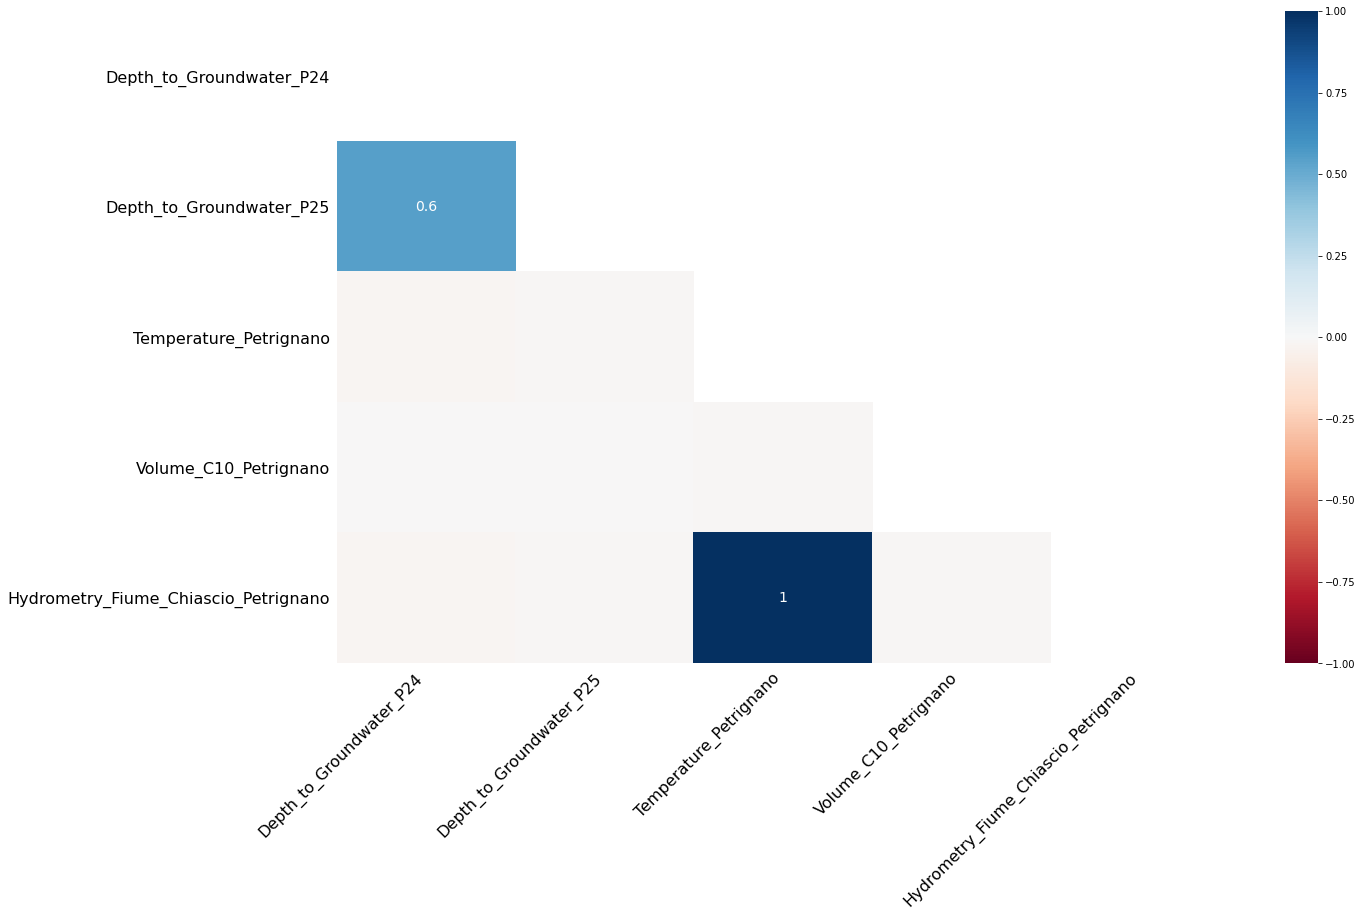

In [20]:
msno.heatmap(petrignano)

Only leaving col5 and 7 interpolation can be done to fix the missing values

In [21]:
col_nos=[2,3,6]
for col_no in col_nos:
    petrignano.loc[:,col_names[col_no]]=petrignano[col_names[col_no]].interpolate()

In [22]:
lr_set=petrignano.filter([col_names[4],col_names[5]],axis=1)
lr_set1=lr_set.dropna()
lr_set1

,Temperature_Bastia_Umbra,Temperature_Petrignano
Date,,
2009-01-01,5.2,4.9
2009-01-02,2.3,2.5
2009-01-03,4.4,3.9
2009-01-04,0.8,0.8
2009-01-05,-1.9,-2.1
...,...,...
2020-06-26,25.7,24.5
2020-06-27,26.2,25.0
2020-06-28,26.9,25.7


In [28]:
model=LinearRegression()
X = np.array(lr_set1[col_names[4]]).reshape(-1, 1)
y= np.array(lr_set1[col_names[5]]).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
model.fit(X=X_train,y=y_train)

LinearRegression()

In [29]:
model.score(X_test,y_test)

0.9946774722242587

In [34]:
for i in range(len(petrignano)):
    if np.isnan(petrignano.iloc[i,4]):
        petrignano.iloc[i,4]=model.predict(petrignano.iloc[i,3].reshape(1, -1))[0][0]
        
    

<AxesSubplot:xlabel='Date'>

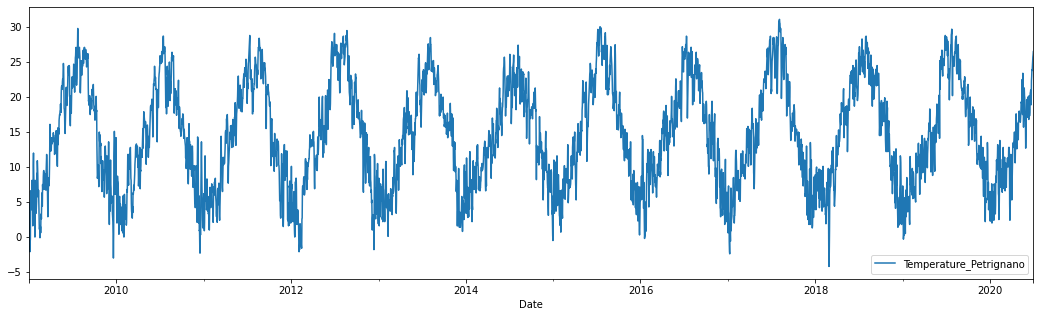

In [35]:
petrignano.plot.line(y=col_names[5],figsize=(18,5))

In [42]:
temp_df=petrignano.filter([col_names[7]],axis=1).copy()
temp_df['Year']=pd.DatetimeIndex(temp_df.index).year
temp_df['month']=pd.DatetimeIndex(temp_df.index).month
temp_df['day']=pd.DatetimeIndex(temp_df.index).day
month_in_year = 12
temp_df['month_sin'] = np.sin(2*np.pi*temp_df.month/month_in_year)
temp_df['month_cos'] = np.cos(2*np.pi*temp_df.month/month_in_year)
temp_df['season'] = temp_df.month%12 // 3 + 1

temp_df['day_of_year'] = pd.DatetimeIndex(temp_df.index).dayofyear
days_in_year = 365.25
temp_df['day_of_year_sin'] = np.sin(2*np.pi*temp_df.day_of_year/days_in_year)
temp_df['day_of_year_cos'] = np.cos(2*np.pi*temp_df.day_of_year/days_in_year)

temp_df['week_of_year'] = pd.DatetimeIndex(temp_df.index).weekofyear
weeks_in_year = 52.1429
temp_df['week_of_year_sin'] = np.sin(2*np.pi*temp_df.week_of_year/weeks_in_year)
temp_df['week_of_year_cos'] = np.cos(2*np.pi*temp_df.week_of_year/weeks_in_year)

c:\users\mansitsuman\desktop\water\aceawateranalytics\waterenv\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  from ipykernel import kernelapp as app


In [43]:
temp_df

,Hydrometry_Fiume_Chiascio_Petrignano,Year,month,day,month_sin,month_cos,season,day_of_year,day_of_year_sin,day_of_year_cos,week_of_year,week_of_year_sin,week_of_year_cos
Date,,,,,,,,,,,,,
2009-01-01,2.4,2009,1,1,5.000000e-01,0.866025,1,1,0.017202,0.999852,1,0.120208,0.992749
2009-01-02,2.5,2009,1,2,5.000000e-01,0.866025,1,2,0.034398,0.999408,1,0.120208,0.992749
2009-01-03,2.4,2009,1,3,5.000000e-01,0.866025,1,3,0.051584,0.998669,1,0.120208,0.992749
2009-01-04,2.4,2009,1,4,5.000000e-01,0.866025,1,4,0.068755,0.997634,1,0.120208,0.992749
2009-01-05,2.3,2009,1,5,5.000000e-01,0.866025,1,5,0.085906,0.996303,2,0.238673,0.971100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,2.5,2020,6,26,1.224647e-16,-1.000000,3,178,0.079477,-0.996837,26,0.008610,-0.999963
2020-06-27,2.4,2020,6,27,1.224647e-16,-1.000000,3,179,0.062318,-0.998056,26,0.008610,-0.999963
2020-06-28,2.4,2020,6,28,1.224647e-16,-1.000000,3,180,0.045141,-0.998981,26,0.008610,-0.999963


In [45]:
attribute=col_names[7]
target = attribute
features = ['month_sin', 'month_cos', 'day_of_year_sin',
            'day_of_year_cos', 'week_of_year_sin', 'week_of_year_cos', 'Year', 'season']

X = temp_df[temp_df[attribute].notna()][features]
y = temp_df[temp_df[attribute].notna()][target]

params = {'num_leaves': 75,
              'objective': 'regression_l1',
              'max_depth': 8,
              'learning_rate': 0.05,
              "metric": 'mae',
              'seed' : 42
            }

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

X_test = temp_df[features]

dtrain = lgb.Dataset(X_train, y_train)
dvalid = lgb.Dataset(X_valid, y_valid)

clf = lgb.train(params, dtrain, 10000, valid_sets = [dtrain, dvalid], verbose_eval=False,  early_stopping_rounds=100)

y_pred_valid = clf.predict(X_valid)
y_pred = clf.predict(X_test)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000531 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 3239, number of used features: 8
[LightGBM] [Info] Start training from score 2.400000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

<AxesSubplot:xlabel='Date'>

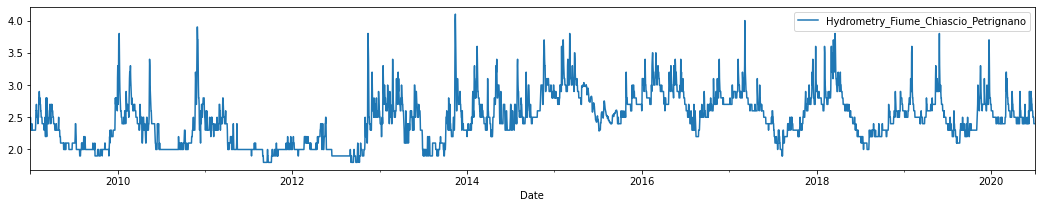

In [46]:
petrignano[attribute] = np.where(petrignano[attribute].isna(), y_pred, petrignano[attribute])
petrignano.plot.line(y=col_names[7],figsize=(18,3))

In [47]:
annual_resampled_data=petrignano.resample('A').mean()

In [48]:
month_resampled_data=petrignano.resample('M').mean()

In [49]:
week_resampled_data=petrignano.resample('W').mean()

In [50]:
month_groupby=petrignano.groupby([petrignano.index.month_name()], sort=False).mean()

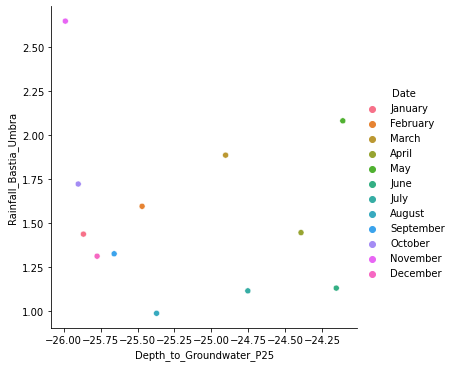

In [106]:
sns.relplot(x=col_names[3],y=col_names[1],data=month_groupby,hue='Date')

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

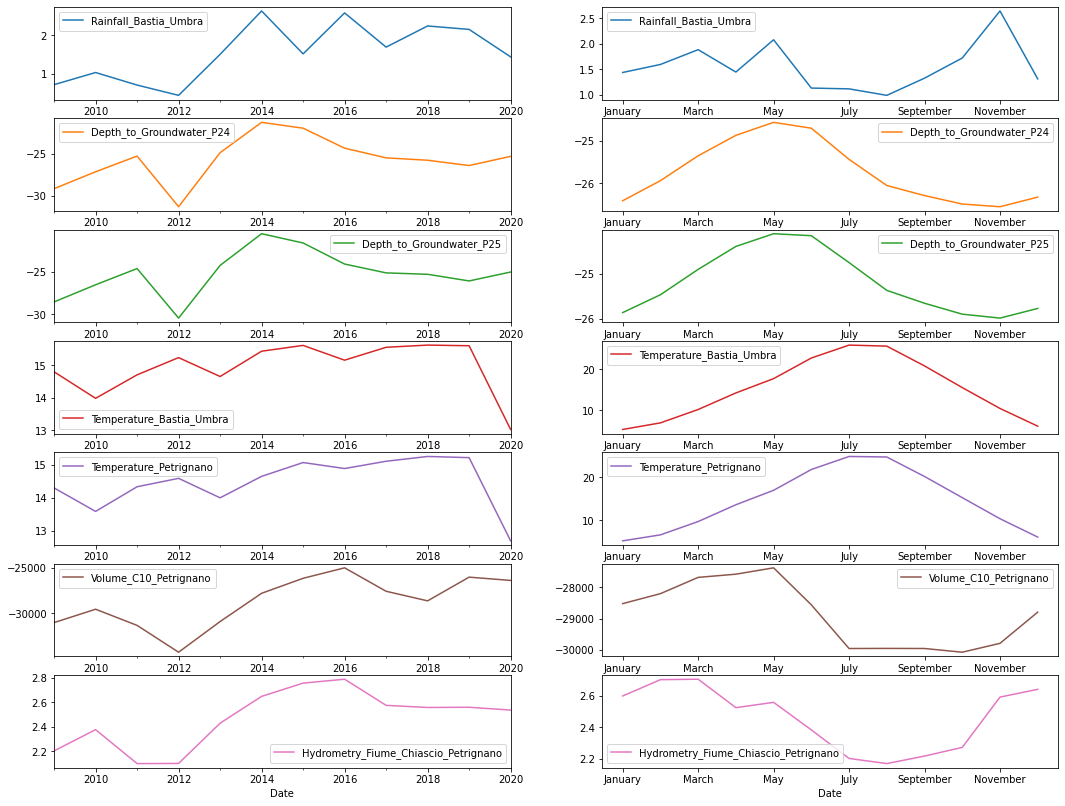

In [51]:
fig, axes = plt.subplots(nrows=(len(col_names))-1,ncols=2,figsize=(18,14))
annual_resampled_data.plot(ax = axes[:,0], subplots=True) 
month_groupby.plot(ax = axes[:,1], subplots=True)

In [52]:
petrignano_lags=petrignano.copy()

In [72]:
corr_annual = pd.DataFrame(columns=['col1','col2','lag'])
column_names = col_names.drop(labels=[0,2,3])

for lagging in column_names:
    for i in range(-5,4):
        lag = i
        col1 = col_names[2]
        col2 = lagging
        correlation = annual_resampled_data[col1].corr(annual_resampled_data[col2].shift(-lag))
        corr_annual=corr_annual.append(pd.DataFrame({'col1':col1,
                                                     'col2':col2,
                                                     'lag':lag,
                                                     'correlation':correlation},index=[0]))
corr_annual.sort_values(by=['correlation'],ascending=False)

,col1,col2,lag,correlation
0,Depth_to_Groundwater_P24,Hydrometry_Fiume_Chiascio_Petrignano,0,0.739764
0,Depth_to_Groundwater_P24,Rainfall_Bastia_Umbra,0,0.675364
0,Depth_to_Groundwater_P24,Volume_C10_Petrignano,0,0.666408
0,Depth_to_Groundwater_P24,Hydrometry_Fiume_Chiascio_Petrignano,1,0.556261
0,Depth_to_Groundwater_P24,Temperature_Petrignano,1,0.549055
0,Depth_to_Groundwater_P24,Volume_C10_Petrignano,1,0.529393
0,Depth_to_Groundwater_P24,Rainfall_Bastia_Umbra,3,0.528092
0,Depth_to_Groundwater_P24,Temperature_Bastia_Umbra,1,0.499954
0,Depth_to_Groundwater_P24,Hydrometry_Fiume_Chiascio_Petrignano,-1,0.474126
0,Depth_to_Groundwater_P24,Hydrometry_Fiume_Chiascio_Petrignano,2,0.458170


In [74]:
corr_month = pd.DataFrame(columns=['col1','col2','lag','correlation'])
column_names = col_names.drop(labels=[0,2,3])

for lagging in column_names:
    for i in range(-13,13):
        lag = i
        col1 = col_names[2]
        col2 = lagging
        correlation = month_resampled_data[col1].corr(month_resampled_data[col2].shift(-lag))
        corr_month=corr_month.append(pd.DataFrame({'col1':col1,
                                                     'col2':col2,
                                                     'lag':lag,
                                                     'correlation':correlation},index=[0]))
corr_month.sort_values(by=['correlation'],ascending=False)

,col1,col2,lag,correlation
0,Depth_to_Groundwater_P24,Hydrometry_Fiume_Chiascio_Petrignano,-3,0.612753
0,Depth_to_Groundwater_P24,Hydrometry_Fiume_Chiascio_Petrignano,-4,0.599044
0,Depth_to_Groundwater_P24,Hydrometry_Fiume_Chiascio_Petrignano,-2,0.589844
0,Depth_to_Groundwater_P24,Volume_C10_Petrignano,-2,0.556190
0,Depth_to_Groundwater_P24,Volume_C10_Petrignano,-1,0.553762
...,...,...,...,...
0,Depth_to_Groundwater_P24,Temperature_Bastia_Umbra,-5,-0.168936
0,Depth_to_Groundwater_P24,Temperature_Bastia_Umbra,-3,-0.209977
0,Depth_to_Groundwater_P24,Temperature_Petrignano,-3,-0.213657
0,Depth_to_Groundwater_P24,Temperature_Bastia_Umbra,-4,-0.222999


In [75]:
corr_week = pd.DataFrame(columns=['col1','col2','lag','correlation'])
column_names = col_names.drop(labels=[0,2,3])

for lagging in column_names:
    for i in range(-13,13):
        lag = i
        col1 = col_names[2]
        col2 = lagging
        correlation = week_resampled_data[col1].corr(week_resampled_data[col2].shift(-lag))
        corr_week=corr_week.append(pd.DataFrame({'col1':col1,
                                                     'col2':col2,
                                                     'lag':lag,
                                                     'correlation':correlation},index=[0]))
corr_week.sort_values(by=['correlation'],ascending=False)

,col1,col2,lag,correlation
0,Depth_to_Groundwater_P24,Hydrometry_Fiume_Chiascio_Petrignano,-13,0.572545
0,Depth_to_Groundwater_P24,Hydrometry_Fiume_Chiascio_Petrignano,-12,0.569866
0,Depth_to_Groundwater_P24,Hydrometry_Fiume_Chiascio_Petrignano,-11,0.565421
0,Depth_to_Groundwater_P24,Hydrometry_Fiume_Chiascio_Petrignano,-10,0.558353
0,Depth_to_Groundwater_P24,Hydrometry_Fiume_Chiascio_Petrignano,-9,0.550029
...,...,...,...,...
0,Depth_to_Groundwater_P24,Temperature_Petrignano,-11,-0.183420
0,Depth_to_Groundwater_P24,Temperature_Bastia_Umbra,-12,-0.193614
0,Depth_to_Groundwater_P24,Temperature_Petrignano,-12,-0.197527
0,Depth_to_Groundwater_P24,Temperature_Bastia_Umbra,-13,-0.205089


In [76]:
corr_daily = pd.DataFrame(columns=['col1','col2','lag','correlation'])
column_names = col_names.drop(labels=[0,2,3])

for lagging in column_names:
    for i in range(-7,7):
        lag = i
        col1 = col_names[2]
        col2 = lagging
        correlation = petrignano[col1].corr(petrignano[col2].shift(-lag))
        corr_daily=corr_daily.append(pd.DataFrame({'col1':col1,
                                                     'col2':col2,
                                                     'lag':lag,
                                                     'correlation':correlation},index=[0]))
corr_daily.sort_values(by=['correlation'],ascending=False)

,col1,col2,lag,correlation
0,Depth_to_Groundwater_P24,Volume_C10_Petrignano,0,0.464026
0,Depth_to_Groundwater_P24,Volume_C10_Petrignano,-1,0.461146
0,Depth_to_Groundwater_P24,Volume_C10_Petrignano,-7,0.460892
0,Depth_to_Groundwater_P24,Volume_C10_Petrignano,-6,0.459328
0,Depth_to_Groundwater_P24,Volume_C10_Petrignano,-2,0.458377
...,...,...,...,...
0,Depth_to_Groundwater_P24,Rainfall_Bastia_Umbra,5,0.065558
0,Depth_to_Groundwater_P24,Rainfall_Bastia_Umbra,6,0.065525
0,Depth_to_Groundwater_P24,Rainfall_Bastia_Umbra,3,0.065505
0,Depth_to_Groundwater_P24,Rainfall_Bastia_Umbra,4,0.064814


In [ ]:
profile = ProfileReport(auser,title='Pandas Profiling Report',html={'style': {'full_width': True}}, sort="None")

In [ ]:
profile.to_file("auser.html")

In [ ]:
auser1= auser.iloc[3224:]

In [ ]:
profile = ProfileReport(auser1,title='Pandas Profiling Report',explorative=True,dark_mode=True,html={'style': {'full_width': True}}, sort="None")

In [ ]:
profile.to_file("auser1.html")